# **Data Science Assignment Zeotap: eCommerce Transactions Dataset**

**Elizabeth Mariya Jose**


## **Task 1**

In [33]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Loading the Datasets

customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [35]:
#Previewing the Data
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [36]:
#  Checking for Missing Values
print("\nMissing Values in Each Dataset:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())



Missing Values in Each Dataset:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [37]:
#Summary Statistics for Numerical Columns
print("\nSummary Statistics:")
print("Customers:\n", customers.describe(include='all'))
print("Products:\n", products.describe(include='all'))
print("Transactions:\n", transactions.describe())



Summary Statistics:
Customers:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN               

In [38]:
#Checking Data Types
print("\nData Types of Each Column:")
print("Customers:\n", customers.dtypes)
print("Products:\n", products.dtypes)
print("Transactions:\n", transactions.dtypes)


Data Types of Each Column:
Customers:
 CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
Products:
 ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
Transactions:
 TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


###Exploratory Analysis - Customers Dataset

In [39]:

print("\nCustomer Region Distribution:")
region_counts = customers['Region'].value_counts()
print(region_counts)



Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-40-7efb44cb2931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', order=region_counts.index, palette='viridis')


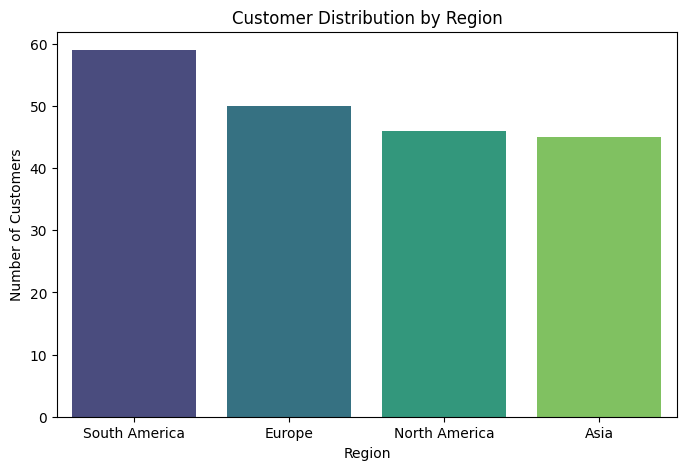

In [40]:
#Visualizing Customer Distribution by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', order=region_counts.index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

<Axes: title={'center': 'Monthly Customer Signups'}, xlabel='SignupDate'>

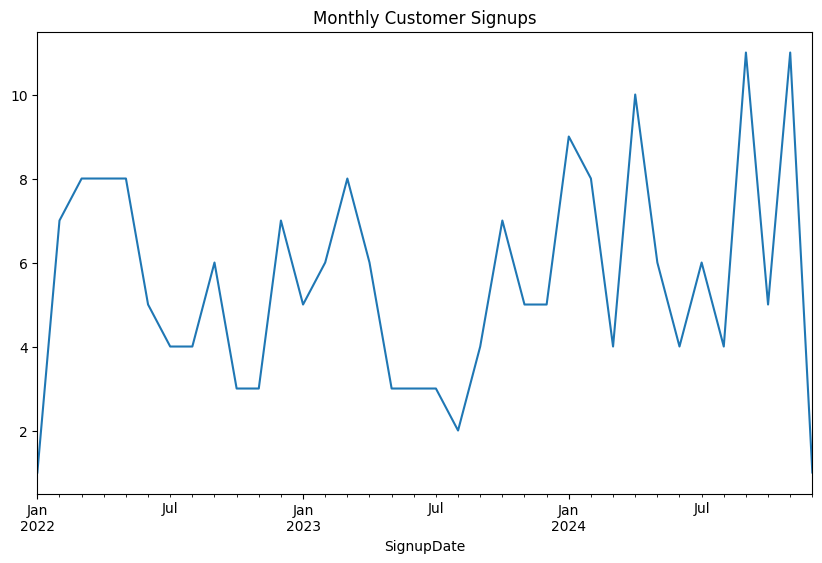

In [41]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
signup_trends.plot(kind='line', figsize=(10, 6), title='Monthly Customer Signups')


**Interpretation**

The bar plot shows the distribution of customers across different regions. It helps identify the geographic concentration of  customers. For instance, North America might have the highest customer count, indicating a potential focus area for marketing or operations.


The line plot reveals trends in customer signups over time. Peaks might correspond to marketing campaigns, seasonal trends, or product launches. Any significant drops should be further investigated.

### Exploratory Analysis - Products Dataset

In [42]:

print("\nProduct Categories Distribution:")
category_counts = products['Category'].value_counts()
print(category_counts)


Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-43-a9f5d8afee07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', order=category_counts.index, palette='coolwarm')


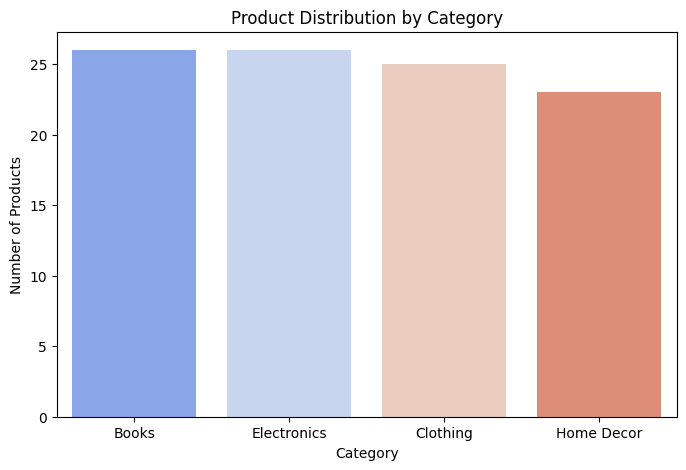

In [43]:
#Visualizing Product Distribution by Category
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', order=category_counts.index, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

<ipython-input-44-009a4cbf7490>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=products, x='Category', y='Price', palette='pastel')


Text(0.5, 1.0, 'Price Distribution by Product Category')

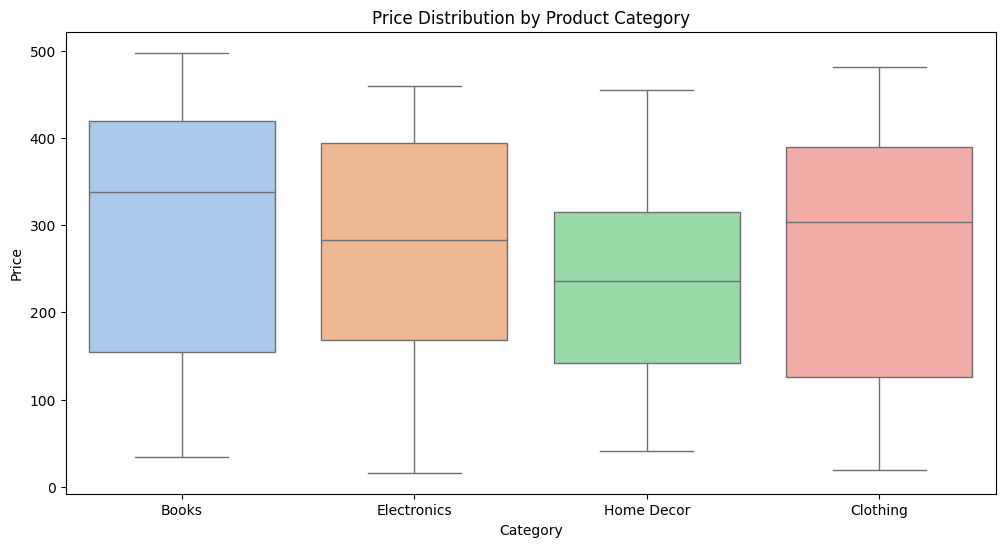

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x='Category', y='Price', palette='pastel')
plt.title('Price Distribution by Product Category')


In [45]:
from scipy.stats import zscore
products['Price_Zscore'] = zscore(products['Price'])
outliers = products[products['Price_Zscore'].abs() > 3]  # Flagging outliers
print(outliers)


Empty DataFrame
Columns: [ProductID, ProductName, Category, Price, Price_Zscore]
Index: []


**Interpretation**

The bar chart indicates the number of products in each category (e.g., Electronics, Clothing). Categories with fewer products might require expansion or strategic attention to meet market demand.


The box plot displays price ranges for different categories. Categories with wide price variations (e.g., Electronics) may offer both budget and premium products, whereas narrower ranges indicate uniform pricing strategies.

###Exploratory Analysis - Transactions Dataset

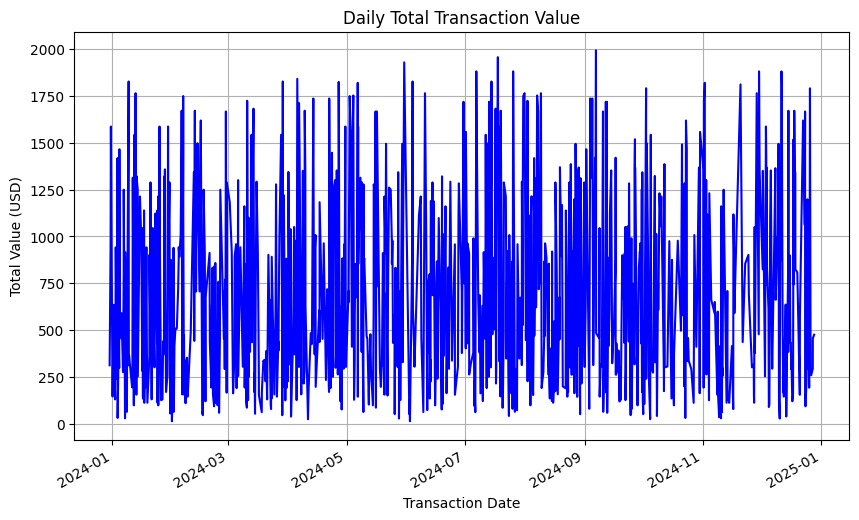

In [46]:
# Visualizing Total Transaction Values by Date
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])  # Convert to datetime
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='blue')
plt.title('Daily Total Transaction Value')
plt.xlabel('Transaction Date')
plt.ylabel('Total Value (USD)')
plt.grid(True)
plt.show()


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

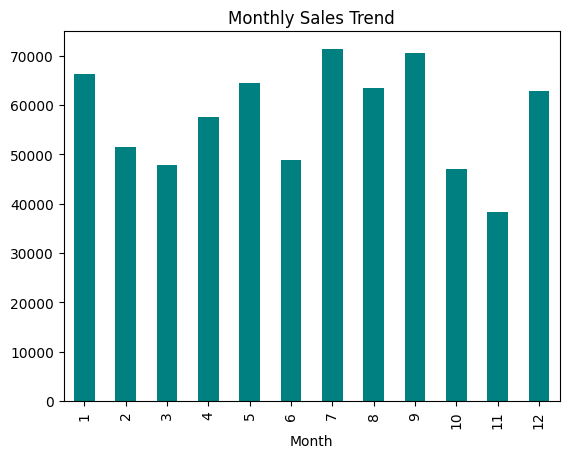

In [47]:
#Seasonal Trends in Transactions
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales Trend', color='teal')


In [48]:
#Calculating the profit margin for each product

transactions['Profit'] = transactions['TotalValue'] - (transactions['Quantity'] * transactions['Price'])
profit_by_product = transactions.groupby('ProductID')['Profit'].sum()
profit_by_product


,Profit
ProductID,
P001,-5.684342e-14
P002,0.000000e+00
P003,8.526513e-14
P004,0.000000e+00
P005,0.000000e+00
...,...
P096,-4.547474e-13
P097,0.000000e+00
P098,0.000000e+00


In [49]:
#Analyzing Top Products by Sales
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products = pd.merge(top_products, products, on='ProductID')  # Add Product Names
print("\nTop 10 Products by Sales:")
print(top_products[['ProductName', 'TotalValue']])


Top 10 Products by Sales:
                ProductName  TotalValue
0        TechPro Headphones    19513.80
1            ActiveWear Rug    17946.91
2          TechPro Cookbook    17905.20
3         ActiveWear Jacket    15060.92
4           HomeSense Novel    14592.24
5           SoundWave Jeans    13947.20
6        TechPro Smartwatch    13778.88
7     ActiveWear Smartwatch    13671.60
8     ComfortLiving Sweater    13487.95
9  ComfortLiving Smartphone    13232.12


In [50]:
# Analyzing Top Customers by Spending
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers = pd.merge(top_customers, customers, on='CustomerID')  # Add Customer Names
print("\nTop 10 Customers by Spending:")
print(top_customers[['CustomerName', 'TotalValue']])


Top 10 Customers by Spending:
           CustomerName  TotalValue
0          Paul Parsons    10673.87
1          Bruce Rhodes     8040.39
2          Gerald Hines     7663.70
3         William Adams     7634.45
4          Aimee Taylor     7572.91
5             Anna Ball     7111.32
6  Mrs. Kimberly Wright     7073.28
7         Jennifer Pena     6819.57
8          Rodney Eaton     6715.72
9         Juan Mcdaniel     6708.10


In [51]:
#  Correlation Analysis for Transactions
print("\nCorrelation Analysis:")
correlation_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()
print(correlation_matrix)


Correlation Analysis:
            Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


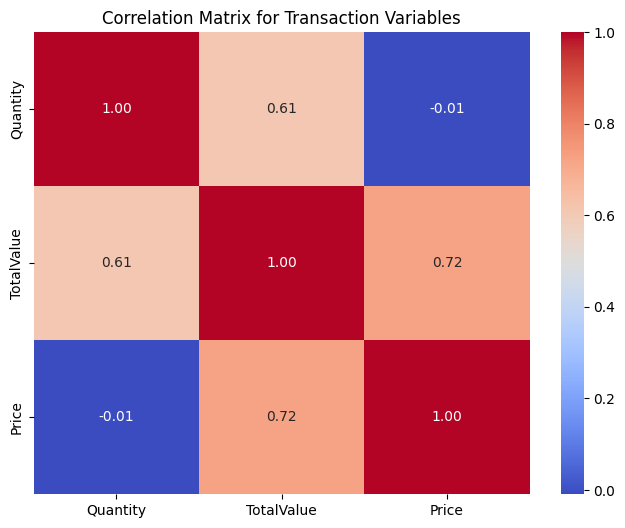

In [52]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Transaction Variables')
plt.show()

**Interpretaion**

* Daily Sales Trend:
The blue line plot shows fluctuations in daily total sales value. Regular spikes could indicate promotions or weekends. High variability suggests inconsistent sales patterns that might need attention.

* Monthly Sales Trend:
The bar chart aggregates sales values by month, highlighting seasonal trends. For example, a sales peak in December might reflect holiday shopping.

* Profit Margin by Product:
Calculated profits for each product help identify high-profit contributors. Products with negligible or zero profit should be reviewed for pricing or cost structures.

* Top Products by Sales:
A table of the highest-grossing products offers insight into customer preferences. Focus on these products can maximize revenue.

* Top Customers by Spending:
Identifying high-value customers allows for targeted retention strategies, such as loyalty programs or exclusive offers.


**Correlation Analysis**

* Quantity and TotalValue: A moderate positive correlation suggests that larger quantities typically result in higher sales values.
* Price and TotalValue: A strong positive correlation indicates that high-priced products significantly contribute to sales value.
* Quantity and Price: Weak correlation implies that product prices do not heavily influence the quantities sold.


## **Business Insights**

**Customer Insights**
* Focusing on regions with a high customer base helps optimize marketing budgets by targeting areas that are likely to yield the best returns.

* Investigating low-signup months provides an opportunity to uncover barriers (e.g., lack of promotions, market seasonality) and implement strategies to boost customer engagement during those periods.

**Product Insights**
* Diversifying offerings in underrepresented categories can help tap into unmet customer needs and expand market share.

* Adjusting pricing strategies ensures products are priced optimally for different customer segments, maximizing revenue while remaining competitive.

**Sales & Transactions**
* Planning promotions around high-sales periods can amplify existing demand, while addressing low-performance days or seasons may smoothen sales variability.

* Prioritizing high-margin products can significantly enhance profitability, especially when paired with effective inventory management and marketing efforts.

**Strategic Focus**
* Strengthening relationships with top-spending customers helps in increasing lifetime value (LTV) through loyalty programs or exclusive offers.

* Optimizing inventory for top-selling products prevents stockouts and ensures a consistent customer experience, boosting satisfaction and loyalty.